### Classifying Hazardous Asteroids
- Finding potentially hazardous and nonhazardous asteroids 
- What features are responsible for claiming an asteroid to be hazardous?

#### Approach:
- Run multiple classification models 
- Use flask to create something interactive that will let a user search for asteroids based on their closest approach date to Earth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'


In [2]:
df = pd.read_csv('./nasa-asteroids-classification/nasa.csv')

In [3]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
df.shape

(4687, 40)

In [5]:
# Check if there are null values
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [6]:
# Inspect the data types
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [7]:
# Convert datetime columns to pandas datetime data types 

df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])

df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])

# Check that it worked
df.dtypes

Neo Reference ID                         int64
Name                                     int64
Absolute Magnitude                     float64
Est Dia in KM(min)                     float64
Est Dia in KM(max)                     float64
Est Dia in M(min)                      float64
Est Dia in M(max)                      float64
Est Dia in Miles(min)                  float64
Est Dia in Miles(max)                  float64
Est Dia in Feet(min)                   float64
Est Dia in Feet(max)                   float64
Close Approach Date             datetime64[ns]
Epoch Date Close Approach                int64
Relative Velocity km per sec           float64
Relative Velocity km per hr            float64
Miles per hour                         float64
Miss Dist.(Astronomical)               float64
Miss Dist.(lunar)                      float64
Miss Dist.(kilometers)                 float64
Miss Dist.(miles)                      float64
Orbiting Body                           object
Orbit ID     

In [8]:
# Rename columns
df.columns = df.columns.str.replace(' ', '_').str.lower().str.replace('.', '')

In [9]:
df['hazardous'].value_counts()

False    3932
True      755
Name: hazardous, dtype: int64

In [10]:
# Assign target label (is_hazardous)
# True: 1
# False: 0
df['hazardous'].replace({True: 1, False: 0}, inplace=True)

In [11]:
df['hazardous'].value_counts()

0    3932
1     755
Name: hazardous, dtype: int64

In [12]:
df.dtypes

neo_reference_id                         int64
name                                     int64
absolute_magnitude                     float64
est_dia_in_km(min)                     float64
est_dia_in_km(max)                     float64
est_dia_in_m(min)                      float64
est_dia_in_m(max)                      float64
est_dia_in_miles(min)                  float64
est_dia_in_miles(max)                  float64
est_dia_in_feet(min)                   float64
est_dia_in_feet(max)                   float64
close_approach_date             datetime64[ns]
epoch_date_close_approach                int64
relative_velocity_km_per_sec           float64
relative_velocity_km_per_hr            float64
miles_per_hour                         float64
miss_dist(astronomical)                float64
miss_dist(lunar)                       float64
miss_dist(kilometers)                  float64
miss_dist(miles)                       float64
orbiting_body                           object
orbit_id     

In [13]:
df['orbiting_body'].value_counts()

Earth    4687
Name: orbiting_body, dtype: int64

In [14]:
cols = list(df.columns)

In [15]:
# Check if name column and neo reference id are all the same
print(f'df rows: {df.shape[0]}')
df[df['name'] == df['neo_reference_id']]

df rows: 4687


,neo_reference_id,name,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),...,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,equinox,hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,0
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,0
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,0
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,0


[Astronomical Unit](https://cneos.jpl.nasa.gov/glossary/au.html)  
[Lunar Distance](https://cneos.jpl.nasa.gov/glossary/LD.html)  
[True Anomoly](https://cneos.jpl.nasa.gov/glossary/true_anomaly.html)  
[Perihelion](https://cneos.jpl.nasa.gov/glossary/perihelion.html)  
[Absolute Magnitude](https://cneos.jpl.nasa.gov/glossary/h.html)
[Jupiter Tisserand Invariant](https://pdssbn.astro.umd.edu/about/what_r_sb.shtml)  
[Tisserand Parameter](http://www2.ess.ucla.edu/~jewitt/tisserand.html)

>\begin{equation}
T_J = \frac{a_J}{a} + 2 \left[(1 - e^2)\frac{a}{a_J}\right]^{1/2} \cos(i)
\end{equation}  

[Mean Anomaly](http://www.columbia.edu/~my2317/asteroidproject.html)
[Epoch](https://en.wikipedia.org/wiki/Epoch_(astronomy))

https://cneos.jpl.nasa.gov/sentry/intro.html  
https://pdssbn.astro.umd.edu/about/what_r_sb.shtml

In [16]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10), dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ['#7F7FFF', '#FCBFB8', '#7F7FFF', '#FCBFB8']
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i]) # feel free to add more settings
        # Set titles, labels, etc for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=f'{title} Histogram')
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)

In [17]:
cols

['neo_reference_id',
 'name',
 'absolute_magnitude',
 'est_dia_in_km(min)',
 'est_dia_in_km(max)',
 'est_dia_in_m(min)',
 'est_dia_in_m(max)',
 'est_dia_in_miles(min)',
 'est_dia_in_miles(max)',
 'est_dia_in_feet(min)',
 'est_dia_in_feet(max)',
 'close_approach_date',
 'epoch_date_close_approach',
 'relative_velocity_km_per_sec',
 'relative_velocity_km_per_hr',
 'miles_per_hour',
 'miss_dist(astronomical)',
 'miss_dist(lunar)',
 'miss_dist(kilometers)',
 'miss_dist(miles)',
 'orbiting_body',
 'orbit_id',
 'orbit_determination_date',
 'orbit_uncertainity',
 'minimum_orbit_intersection',
 'jupiter_tisserand_invariant',
 'epoch_osculation',
 'eccentricity',
 'semi_major_axis',
 'inclination',
 'asc_node_longitude',
 'orbital_period',
 'perihelion_distance',
 'perihelion_arg',
 'aphelion_dist',
 'perihelion_time',
 'mean_anomaly',
 'mean_motion',
 'equinox',
 'hazardous']

In [18]:
df.dtypes

neo_reference_id                         int64
name                                     int64
absolute_magnitude                     float64
est_dia_in_km(min)                     float64
est_dia_in_km(max)                     float64
est_dia_in_m(min)                      float64
est_dia_in_m(max)                      float64
est_dia_in_miles(min)                  float64
est_dia_in_miles(max)                  float64
est_dia_in_feet(min)                   float64
est_dia_in_feet(max)                   float64
close_approach_date             datetime64[ns]
epoch_date_close_approach                int64
relative_velocity_km_per_sec           float64
relative_velocity_km_per_hr            float64
miles_per_hour                         float64
miss_dist(astronomical)                float64
miss_dist(lunar)                       float64
miss_dist(kilometers)                  float64
miss_dist(miles)                       float64
orbiting_body                           object
orbit_id     

In [19]:
pd.to_datetime(df.close_approach_date).value_counts()

2016-07-22    18
2015-01-15    17
2015-02-15    16
2014-11-22    16
2012-03-15    16
              ..
2001-06-22     1
2001-10-22     1
1999-05-15     1
1997-12-22     1
1995-12-22     1
Name: close_approach_date, Length: 777, dtype: int64

In [20]:
df['orbit_determination_date']

0      2017-04-06 08:36:37
1      2017-04-06 08:32:49
2      2017-04-06 09:20:19
3      2017-04-06 09:15:49
4      2017-04-06 08:57:58
               ...        
4682   2017-04-06 08:24:07
4683   2017-04-06 08:23:58
4684   2017-04-06 08:23:43
4685   2017-04-06 08:23:42
4686   2017-04-29 06:18:33
Name: orbit_determination_date, Length: 4687, dtype: datetime64[ns]

In [21]:
df.duplicated(['name', 'orbit_determination_date']).sum()

995

In [22]:
df[['name', 'orbit_determination_date']].nunique()

name                        3692
orbit_determination_date    2680
dtype: int64

In [23]:
df[df['name'].duplicated()]['orbit_determination_date']

134    2017-04-06 08:41:50
147    2017-05-03 06:18:20
150    2017-05-15 19:03:44
194    2017-04-06 08:57:57
248    2017-04-06 08:45:08
               ...        
4667   2017-04-06 08:49:01
4668   2017-04-06 08:59:17
4678   2017-04-06 09:07:40
4680   2017-04-06 08:49:02
4681   2017-04-06 08:42:24
Name: orbit_determination_date, Length: 995, dtype: datetime64[ns]

In [24]:
df['name'].nunique()

3692

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
neo_reference_id,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
name,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
absolute_magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
est_dia_in_km(min),4687.0,2.046042e-01,3.695734e-01,1.010543e-03,3.346224e-02,1.108039e-01,2.538370e-01,1.557955e+01
est_dia_in_km(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
est_dia_in_m(min),4687.0,2.046042e+02,3.695734e+02,1.010543e+00,3.346224e+01,1.108039e+02,2.538370e+02,1.557955e+04
est_dia_in_m(max),4687.0,4.575089e+02,8.263912e+02,2.259644e+00,7.482384e+01,2.477650e+02,5.675969e+02,3.483694e+04
est_dia_in_miles(min),4687.0,1.271351e-01,2.296422e-01,6.279224e-04,2.079246e-02,6.885032e-02,1.577270e-01,9.680682e+00
est_dia_in_miles(max),4687.0,2.842828e-01,5.134956e-01,1.404077e-03,4.649336e-02,1.539540e-01,3.526882e-01,2.164666e+01
est_dia_in_feet(min),4687.0,6.712737e+02,1.212511e+03,3.315431e+00,1.097842e+02,3.635298e+02,8.327987e+02,5.111402e+04


In [26]:
def plot_scatterplot(dataframe, list_of_columns, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5), dpi=80)
    plt.scatter(dataframe[list_of_columns[0]],
            dataframe[list_of_columns[1]], c= '#7F7FFF')
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize=12);

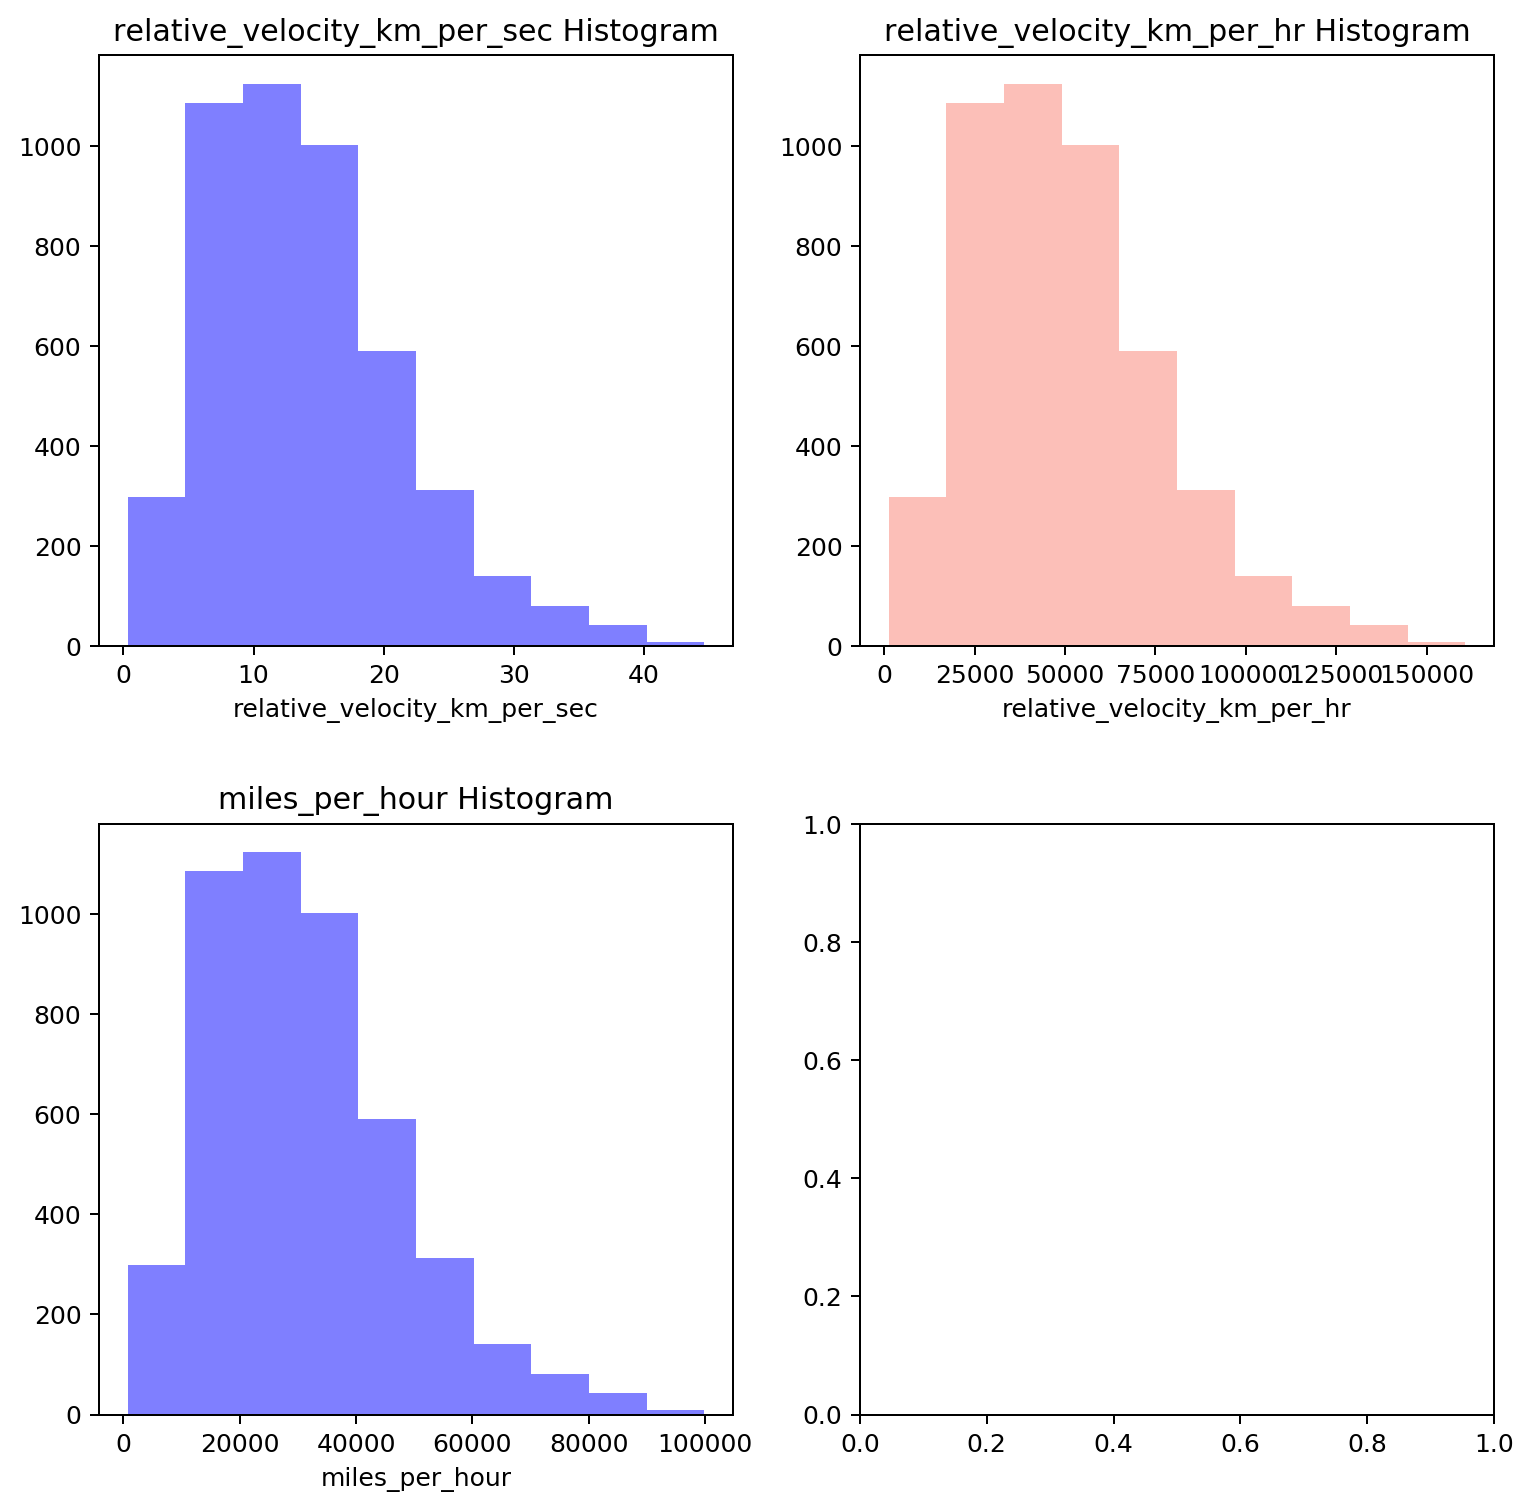

In [27]:
subplot_histograms(df, 
                   ['relative_velocity_km_per_sec', 'relative_velocity_km_per_hr', 'miles_per_hour'],
                  ['relative_velocity_km_per_sec', 'relative_velocity_km_per_hr', 'miles_per_hour'],
                  ['relative_velocity_km_per_sec', 'relative_velocity_km_per_hr', 'miles_per_hour'])

In [28]:
# big = pd.read_csv('./results (1).csv')

In [29]:
# big.info()

In [32]:
cols

['neo_reference_id',
 'name',
 'absolute_magnitude',
 'est_dia_in_km(min)',
 'est_dia_in_km(max)',
 'est_dia_in_m(min)',
 'est_dia_in_m(max)',
 'est_dia_in_miles(min)',
 'est_dia_in_miles(max)',
 'est_dia_in_feet(min)',
 'est_dia_in_feet(max)',
 'close_approach_date',
 'epoch_date_close_approach',
 'relative_velocity_km_per_sec',
 'relative_velocity_km_per_hr',
 'miles_per_hour',
 'miss_dist(astronomical)',
 'miss_dist(lunar)',
 'miss_dist(kilometers)',
 'miss_dist(miles)',
 'orbiting_body',
 'orbit_id',
 'orbit_determination_date',
 'orbit_uncertainity',
 'minimum_orbit_intersection',
 'jupiter_tisserand_invariant',
 'epoch_osculation',
 'eccentricity',
 'semi_major_axis',
 'inclination',
 'asc_node_longitude',
 'orbital_period',
 'perihelion_distance',
 'perihelion_arg',
 'aphelion_dist',
 'perihelion_time',
 'mean_anomaly',
 'mean_motion',
 'equinox',
 'hazardous']